In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_18_4.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_18_4.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 5s - loss: 0.2917 - accuracy: 0.8742 - val_loss: 0.2451 - val_accuracy: 0.8899
Epoch 2/100
100000/100000 - 4s - loss: 0.2285 - accuracy: 0.8978 - val_loss: 0.2224 - val_accuracy: 0.9013
Epoch 3/100
100000/100000 - 3s - loss: 0.2126 - accuracy: 0.9055 - val_loss: 0.2123 - val_accuracy: 0.9088
Epoch 4/100
100000/100000 - 3s - loss: 0.2015 - accuracy: 0.9117 - val_loss: 0.1999 - val_accuracy: 0.9122
Epoch 5/100
100000/100000 - 3s - loss: 0.1874 - accuracy: 0.9184 - val_loss: 0.1910 - val_accuracy: 0.9164
Epoch 6/100
100000/100000 - 3s - loss: 0.1792 - accuracy: 0.9227 - val_loss: 0.1779 - val_accuracy: 0.9241
Epoch 7/100
100000/100000 - 3s - loss: 0.1658 - accuracy: 0.9285 - val_loss: 0.1699 - val_accuracy: 0.9272
Epoch 8/100
100000/100000 - 3s - loss: 0.1569 - accuracy: 0.9320 - val_loss: 0.1606 - val_accuracy: 0.9314
Epoch 9/100
100000/100000 - 3s - loss: 0.1475 - accuracy: 0.9353 - val_loss: 0.1501 - val_accu

Epoch 77/100
100000/100000 - 3s - loss: 0.0399 - accuracy: 0.9841 - val_loss: 0.1277 - val_accuracy: 0.9603
Epoch 78/100
100000/100000 - 3s - loss: 0.0411 - accuracy: 0.9839 - val_loss: 0.1205 - val_accuracy: 0.9629
Epoch 79/100
100000/100000 - 3s - loss: 0.0389 - accuracy: 0.9846 - val_loss: 0.1242 - val_accuracy: 0.9629
Epoch 80/100
100000/100000 - 3s - loss: 0.0416 - accuracy: 0.9837 - val_loss: 0.1201 - val_accuracy: 0.9613
Epoch 81/100
100000/100000 - 3s - loss: 0.0390 - accuracy: 0.9847 - val_loss: 0.1154 - val_accuracy: 0.9638
Epoch 82/100
100000/100000 - 3s - loss: 0.0399 - accuracy: 0.9844 - val_loss: 0.1172 - val_accuracy: 0.9632
Epoch 83/100
100000/100000 - 3s - loss: 0.0372 - accuracy: 0.9854 - val_loss: 0.1201 - val_accuracy: 0.9624
Epoch 84/100
100000/100000 - 3s - loss: 0.0370 - accuracy: 0.9855 - val_loss: 0.1219 - val_accuracy: 0.9626
Epoch 85/100
100000/100000 - 3s - loss: 0.0379 - accuracy: 0.9852 - val_loss: 0.1173 - val_accuracy: 0.9637
Epoch 86/100
100000/100000 -

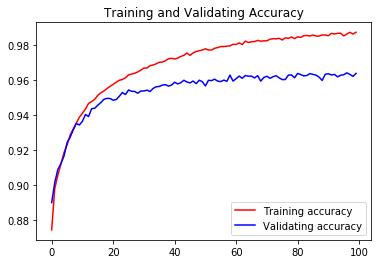

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_18_4_model.h5')

In [16]:
#json_string  = model.to_json()
#with open("C:\\Users\\Wilfred\\Desktop\\json_model.json", "w") as json_file:
#    json_file.write(json_string)

In [5]:
#model.save_weights('C:\\Users\\Wilfred\\Desktop\\Look_ahead_N_4_6_15_2_weights.h5')